In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc

**data de precipitations mensuelles pour plusieurs SSP de 1950 à 2100**

In [2]:
data = "dfcanada.nc"
data= xr.open_dataset(data, decode_times=True)
data

<xarray.Dataset>
Dimensions:             (time: 1812, lat: 6, lon: 11)
Coordinates:
  * time                (time) datetime64[ns] 1950-01-01 ... 2100-12-01
  * lat                 (lat) float64 45.29 45.38 45.46 45.54 45.62 45.71
  * lon                 (lon) float64 -74.21 -74.12 -74.04 ... -73.46 -73.38
Data variables:
    ssp126_prcptot_p10  (time, lat, lon) float32 ...
    ssp126_prcptot_p50  (time, lat, lon) float32 ...
    ssp126_prcptot_p90  (time, lat, lon) float32 ...
    ssp245_prcptot_p10  (time, lat, lon) float32 ...
    ssp245_prcptot_p50  (time, lat, lon) float32 ...
    ssp245_prcptot_p90  (time, lat, lon) float32 ...
    ssp585_prcptot_p10  (time, lat, lon) float32 ...
    ssp585_prcptot_p50  (time, lat, lon) float32 ...
    ssp585_prcptot_p90  (time, lat, lon) float32 ...
Attributes: (12/46)
    Conventions:                  CF-1.7 CMIP-6.2
    GCM__experiment:              historical,ssp126
    GCM__experiment_id:           historical,ssp126
    GCM__initialization_index:    1
    activity_id:                  CMIP
    cat:_data_format_:            zarr
    ...                           ...
    target__references:           Werner, A.T., Schnorbus, M.A., Shrestha, R....
    target__version:              2.1 (September 2021)
    intake_esm_vars:              prcptot
    cat:id:                       CanDCS-M6_CMIP6_ScenarioMIP_ssp126_CAN
    ensemble_size:                26
    cat:one_var:                  prcptot

In [3]:
data.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 1812)>
array(['1950-01-01T00:00:00.000000000', '1950-02-01T00:00:00.000000000',
       '1950-03-01T00:00:00.000000000', ..., '2100-10-01T00:00:00.000000000',
       '2100-11-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]'), 'ssp126_prcptot_p10': <xarray.Variable (time: 1812, lat: 6, lon: 11)>
[119592 values with dtype=float32]
Attributes:
    cell_methods:   time: mean time: sum over days
    description:    Monthly total precipitation. 10th percentile of ensemble.
    history:        [2024-04-18 04:53:33] prcptot: ccdp.PRCPTOT_MON(pr=pr, th...
    long_name:      Total accumulated precipitation
    standard_name:  lwe_thickness_of_precipitation_amount
    units:          mm, 'ssp126_prcptot_p50': <xarray.Variable (time: 1812, lat: 6, lon: 11)>
[119592 values with dtype=float32]
Attributes:
    cell_methods:   time: mean time: sum over days
    description:    Monthly total precipitation. 50th pe

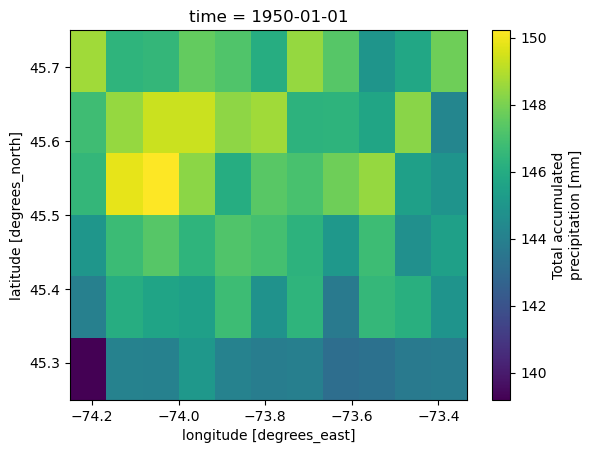

In [4]:

temps=" 1950-01-01"
data.sel(time= temps).ssp126_prcptot_p90.plot()

Text(0.5, 1.0, " Courbe d'évolution des precipitations totale liquide dans une station de Quebec")

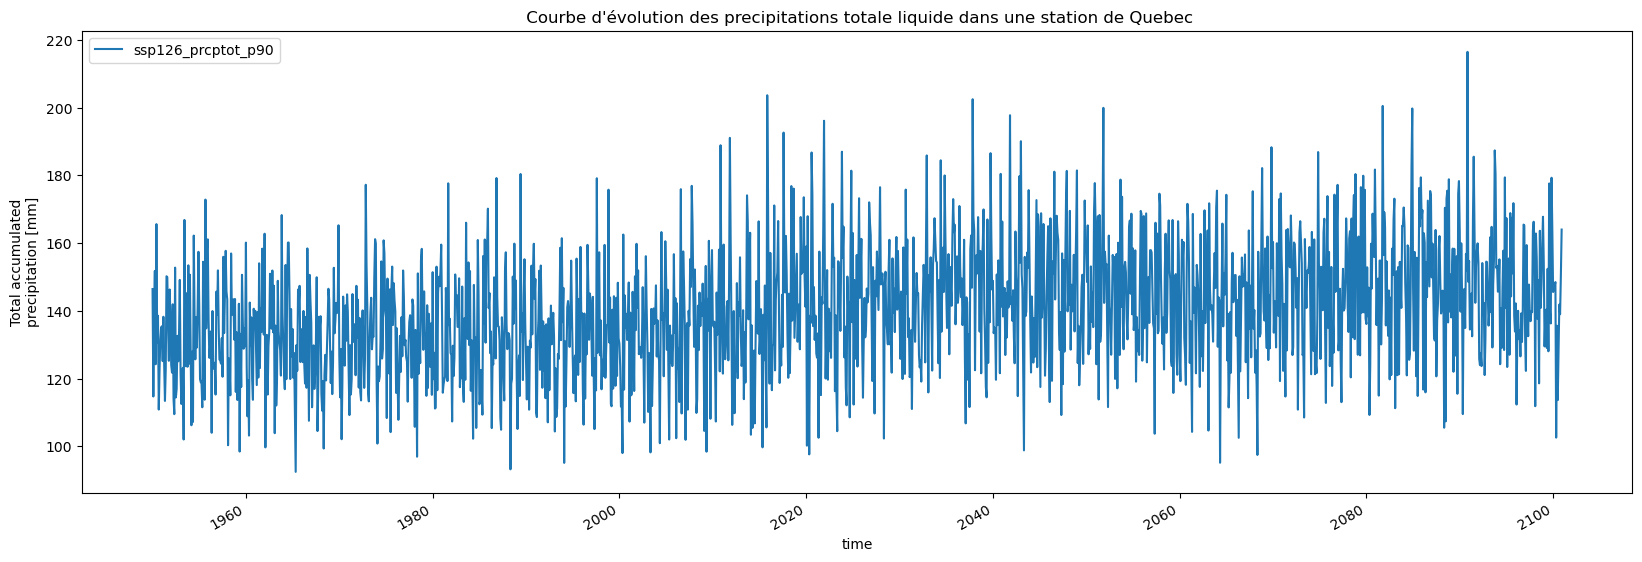

In [5]:
plt.figure(figsize=(20, 6))
longitude= -74
latitude=46.4
data.sel(lon=longitude, lat=latitude, method='nearest').ssp126_prcptot_p90.plot(label="ssp126_prcptot_p90" )
plt.legend()
plt.title (" Courbe d'évolution des precipitations totale liquide dans une station de Quebec")



In [6]:
DF=data.ssp126_prcptot_p90.to_dataframe()

DF


ssp126_prcptot_p90
time       lat       lon                           
1950-01-01 45.291668 -74.208328          139.194656
                     -74.125000          144.047043
                     -74.041664          144.008865
                     -73.958328          145.076981
                     -73.875000          144.054626
...                                             ...
2100-12-01 45.708332 -73.708328          165.318069
                     -73.625000          163.265732
                     -73.541664          166.523560
                     -73.458328          164.684860
                     -73.375000          165.669037

[119592 rows x 1 columns]

In [7]:

df = DF.reset_index()
print(df)


             time        lat        lon  ssp126_prcptot_p90
0      1950-01-01  45.291668 -74.208328          139.194656
1      1950-01-01  45.291668 -74.125000          144.047043
2      1950-01-01  45.291668 -74.041664          144.008865
3      1950-01-01  45.291668 -73.958328          145.076981
4      1950-01-01  45.291668 -73.875000          144.054626
...           ...        ...        ...                 ...
119587 2100-12-01  45.708332 -73.708328          165.318069
119588 2100-12-01  45.708332 -73.625000          163.265732
119589 2100-12-01  45.708332 -73.541664          166.523560
119590 2100-12-01  45.708332 -73.458328          164.684860
119591 2100-12-01  45.708332 -73.375000          165.669037

[119592 rows x 4 columns]


In [8]:
df["time"] = pd.to_datetime(df["time"])

df.set_index("time", inplace=True)


In [9]:
df.index

DatetimeIndex(['1950-01-01', '1950-01-01', '1950-01-01', '1950-01-01',
               '1950-01-01', '1950-01-01', '1950-01-01', '1950-01-01',
               '1950-01-01', '1950-01-01',
               ...
               '2100-12-01', '2100-12-01', '2100-12-01', '2100-12-01',
               '2100-12-01', '2100-12-01', '2100-12-01', '2100-12-01',
               '2100-12-01', '2100-12-01'],
              dtype='datetime64[ns]', name='time', length=119592, freq=None)

In [10]:
df.ssp126_prcptot_p90.isna().sum()       # verifier qu'il n'ya pas de valeurs manquqntes


0

/var/folders/jr/0lz9g5ys5px110b87tng96080000gq/T/ipykernel_46267/3114642667.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["ssp126_prcptot_p90"]["1950": "2100"].resample("Y").mean().plot()


<Axes: xlabel='time'>

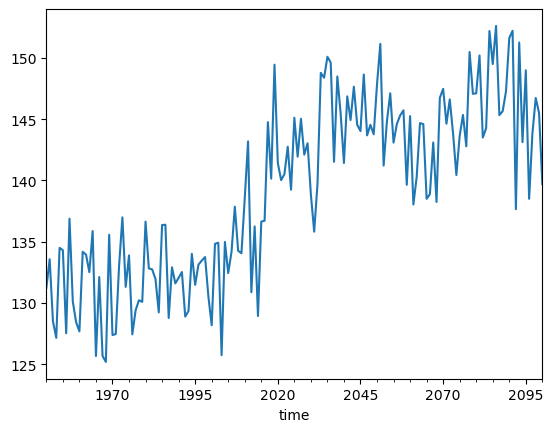

In [11]:

df["ssp126_prcptot_p90"]["1950": "2100"].resample("Y").mean().plot()

Text(0.5, 1.0, " Courbe d'évolution des precipitations totale liquide dans une grille")

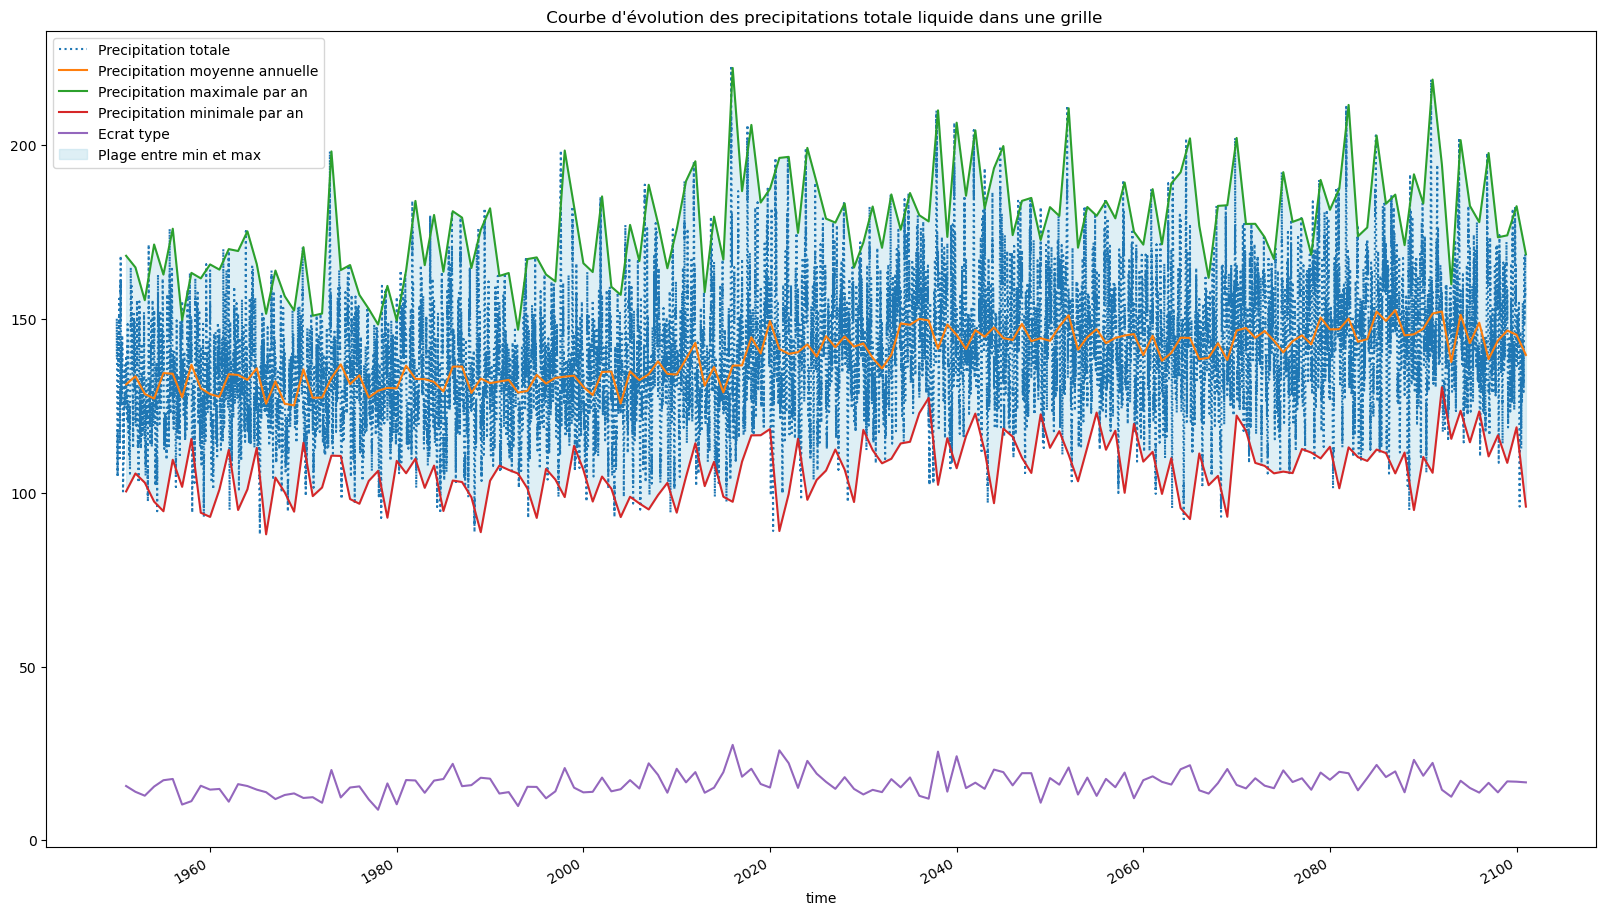

In [12]:
plt.figure(figsize=(20, 12))

df["ssp126_prcptot_p90"]["1900": "2100"].plot(label= "Precipitation totale", ls=":")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("YE").mean().plot(label= "Precipitation moyenne annuelle")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("YE").max().plot(label= "Precipitation maximale par an")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("YE").min().plot(label= "Precipitation minimale par an")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("YE").std().plot(label= "Ecrat type")
#df["ssp126_prcptot_p90"]["1900": "2100"].resample("2Y").mean().plot(label= "Precipitation moyennèe sur chaque 2 ans")

min_values = df["ssp126_prcptot_p90"]["1900": "2100"].resample("YE").min()
max_values = df["ssp126_prcptot_p90"]["1900": "2100"].resample("YE").max()
plt.fill_between(min_values.index, min_values, max_values, color="lightblue", alpha=0.4, label="Plage entre min et max")

plt.legend()
plt.title (" Courbe d'évolution des precipitations totale liquide dans une grille")






/var/folders/jr/0lz9g5ys5px110b87tng96080000gq/T/ipykernel_46267/2945466676.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").max().plot(label= "Precipitation maximale par an")
/var/folders/jr/0lz9g5ys5px110b87tng96080000gq/T/ipykernel_46267/2945466676.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").min().plot(label= "Precipitation minimale par an")
/var/folders/jr/0lz9g5ys5px110b87tng96080000gq/T/ipykernel_46267/2945466676.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").std().plot(label= "Ecrat type")
/var/folders/jr/0lz9g5ys5px110b87tng96080000gq/T/ipykernel_46267/2945466676.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future vers

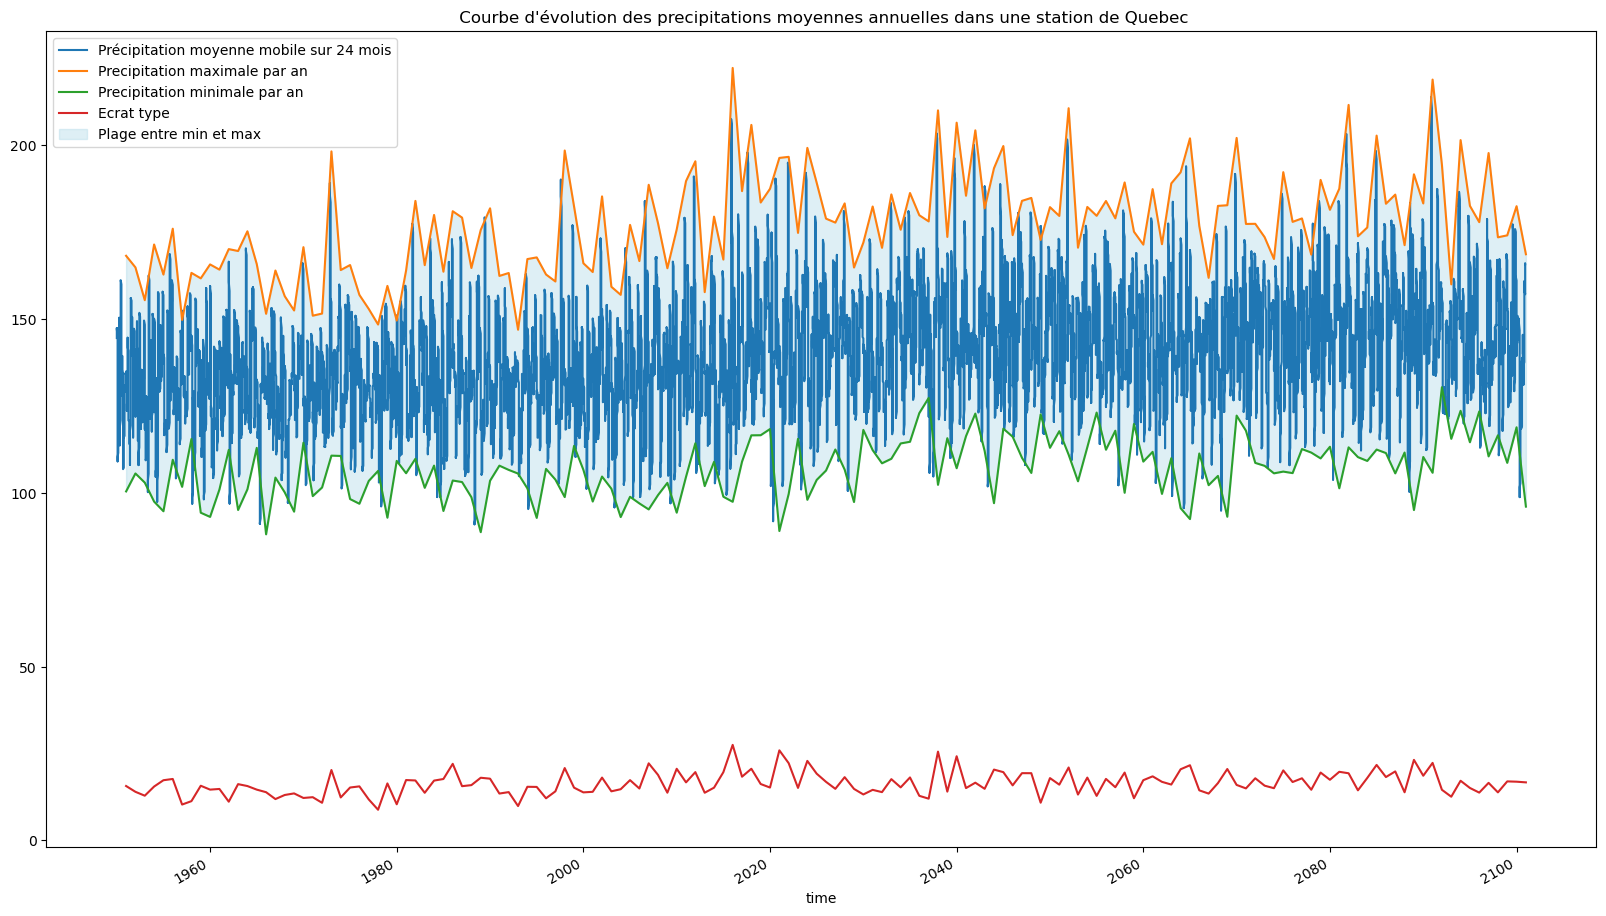

In [13]:
plt.figure(figsize=(20, 12))

#df["ssp126_prcptot_p90"]["1900": "2100"].plot(label= "Precipitation totale", ls=":")
df["ssp126_prcptot_p90"]["1900": "2100"].rolling(window=24).mean().plot(label="Précipitation moyenne mobile sur 24 mois")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").max().plot(label= "Precipitation maximale par an")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").min().plot(label= "Precipitation minimale par an")
df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").std().plot(label= "Ecrat type")

plt.fill_between(min_values.index, min_values, max_values, color="lightblue", alpha=0.4, label="Plage entre min et max")

plt.legend()
plt.title (" Courbe d'évolution des precipitations moyennes annuelles dans une station de Quebec")

min_values = df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").min()
max_values = df["ssp126_prcptot_p90"]["1900": "2100"].resample("Y").max()




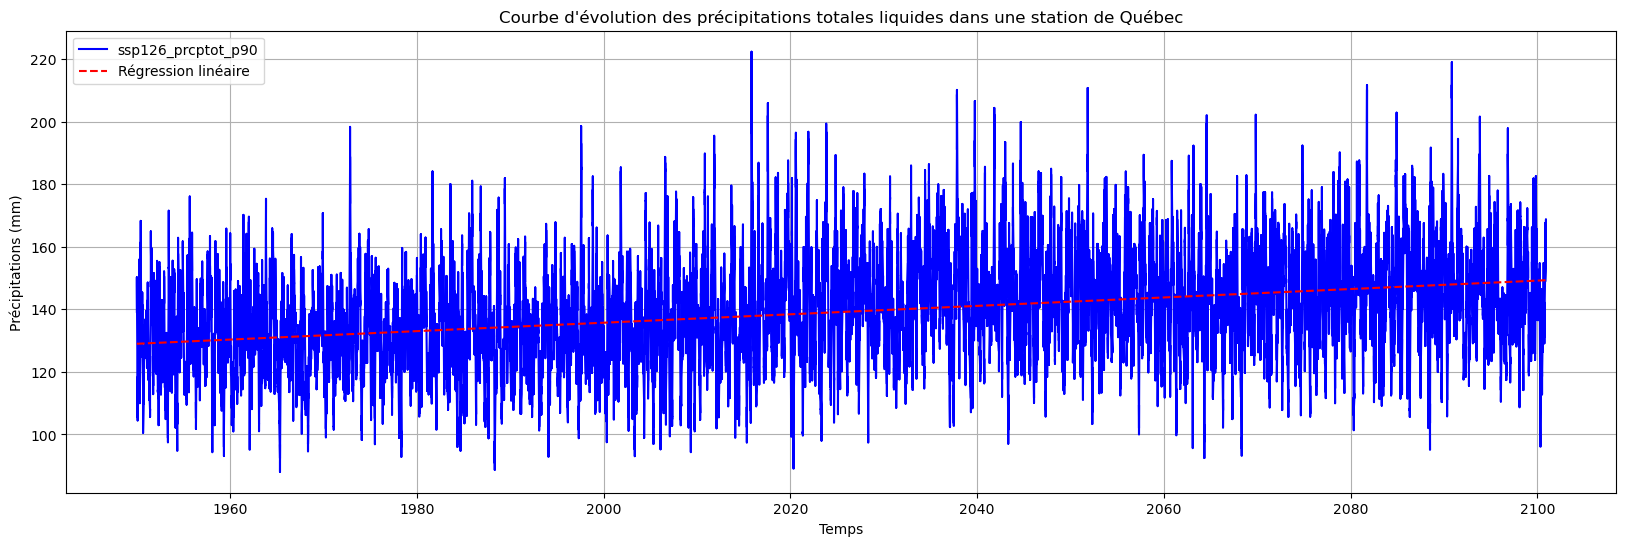

In [14]:
df['time_index'] = (df.index - df.index[0]).days 

x = df['time_index'] 
y = df["ssp126_prcptot_p90"]

# Calcul de la régression linéaire
coefficients = np.polyfit(x, y, deg=1)
regression_line = np.polyval(coefficients, x)

plt.figure(figsize=(20, 6))
plt.plot(df.index, y, label="ssp126_prcptot_p90", color="blue")
plt.plot(df.index, regression_line, label="Régression linéaire", color="red", linestyle="--")
plt.title("Courbe d'évolution des précipitations totales liquides dans une station de Québec")
plt.xlabel("Temps")
plt.ylabel("Précipitations (mm)")
plt.legend()
plt.grid()
plt.show()


In [15]:
test=data.ssp126_prcptot_p90.to_dataframe().reset_index()
test
test['time'] = pd.to_datetime(test['time'])

test.ssp126_prcptot_p90.isna().sum()

0

In [16]:
df.groupby("time", dropna=True).mean()


,lat,lon,ssp126_prcptot_p90,time_index
time,,,,
1950-01-01,45.5,-73.791664,146.159714,0.0
1950-02-01,45.5,-73.791664,109.919533,31.0
1950-03-01,45.5,-73.791664,140.620895,59.0
1950-04-01,45.5,-73.791664,148.859695,90.0
1950-05-01,45.5,-73.791664,116.193527,120.0
...,...,...,...,...
2100-08-01,45.5,-73.791664,134.664246,54999.0
2100-09-01,45.5,-73.791664,142.563370,55030.0
2100-10-01,45.5,-73.791664,133.699554,55060.0


In [17]:
df.index = pd.to_datetime(df.index)
df['year'] = df.index.year
df.head(35)

,lat,lon,ssp126_prcptot_p90,time_index,year
time,,,,,
1950-01-01,45.291668,-74.208328,139.194656,0,1950
1950-01-01,45.291668,-74.125000,144.047043,0,1950
1950-01-01,45.291668,-74.041664,144.008865,0,1950
1950-01-01,45.291668,-73.958328,145.076981,0,1950
1950-01-01,45.291668,-73.875000,144.054626,0,1950
1950-01-01,45.291668,-73.791664,143.833389,0,1950
1950-01-01,45.291668,-73.708328,143.932526,0,1950
1950-01-01,45.291668,-73.625000,143.154358,0,1950
1950-01-01,45.291668,-73.541664,143.291718,0,1950


In [18]:
import pandas as pd

df_annual = df.groupby('year', dropna=True).sum()

print(df_annual)

          lat           lon  ssp126_prcptot_p90  time_index
year                                                       
1950  36036.0 -58442.997986       103935.101562      131868
1951  36036.0 -58442.997986       105791.281250      420948
1952  36036.0 -58442.997986       101766.328125      710688
1953  36036.0 -58442.997986       100706.632812      999900
1954  36036.0 -58442.997986       106526.203125     1288980
...       ...           ...                 ...         ...
2096  36036.0 -58442.997986       109694.171875    42366720
2097  36036.0 -58442.997986       113931.023438    42655932
2098  36036.0 -58442.997986       116214.273438    42945012
2099  36036.0 -58442.997986       115247.960938    43234092
2100  36036.0 -58442.997986       110650.734375    43523172

[151 rows x 4 columns]
